AMV Historical Data

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Đọc file dữ liệu
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Chia dữ liệu train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [5]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [6]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Quá trình tạo index predict 30, 60, 90 ngày tiếp theo
last_index = df.index[-1]

In [8]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [9]:
# 7.Dự đoán giá trong 30, 60 và 90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [10]:
# 8. Giá dự đoán trong 30, 60 và 90 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.07681241]
Predicted closing prices for the next 60 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.

In [11]:
# 9. Đánh giá độ chính xác thuật toán
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# MSLE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 7781.265563761791
Testing RMSE: 7781.265563761791
Validation MAPE: 49.62661364635552
Testing MAPE: 49.62661364635552
Validation MSLE: 0.19619194192901138
Testing MSLE: 0.19619194192901138


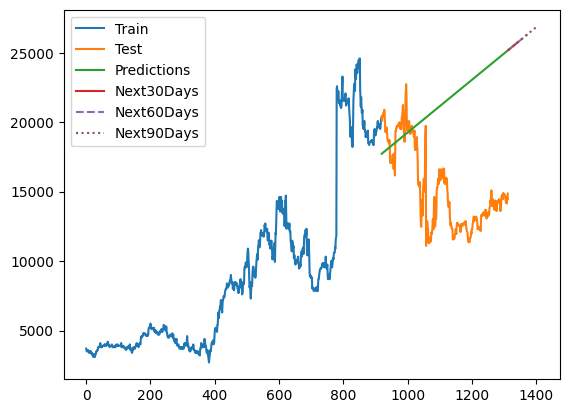

In [12]:
# 10. Vẽ hình
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days', linestyle='--')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days', linestyle=':')
plt.legend()
plt.show()

DHT Historical Data

In [13]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [14]:
# 2. Đọc file dữ liệu
df = pd.read_csv('DHT Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [15]:
df

0       40400.0
1       39300.0
2       39500.0
3       39300.0
4       38600.0
         ...   
1307    11589.7
1308    11561.6
1309    11337.1
1310    11224.9
1311    10860.1
Name: Price, Length: 1312, dtype: float64

In [16]:
# 3. Chia dữ liệu train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

In [17]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [19]:
# 6. Quá trình tạo index predict 30, 60, 90 ngày tiếp theo
last_index = df.index[-1]

In [20]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [21]:
# 7.Dự đoán giá trong 30, 60 và 90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [22]:
# 8. Giá dự đoán trong 30, 60 và 90 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[25185.94335858 25204.91447371 25223.88558883 25242.85670396
 25261.82781909 25280.79893422 25299.77004935 25318.74116447
 25337.7122796  25356.68339473 25375.65450986 25394.62562498
 25413.59674011 25432.56785524 25451.53897037 25470.5100855
 25489.48120062 25508.45231575 25527.42343088 25546.39454601
 25565.36566114 25584.33677626 25603.30789139 25622.27900652
 25641.25012165 25660.22123677 25679.1923519  25698.16346703
 25717.13458216 25736.10569729]
Predicted closing prices for the next 60 days:
[25185.94335858 25204.91447371 25223.88558883 25242.85670396
 25261.82781909 25280.79893422 25299.77004935 25318.74116447
 25337.7122796  25356.68339473 25375.65450986 25394.62562498
 25413.59674011 25432.56785524 25451.53897037 25470.5100855
 25489.48120062 25508.45231575 25527.42343088 25546.39454601
 25565.36566114 25584.33677626 25603.30789139 25622.27900652
 25641.25012165 25660.22123677 25679.1923519  25698.16346703
 25717.13458216 25736.

In [23]:
# 9. Đánh giá độ chính xác thuật toán
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# MSLE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 7781.265563761791
Testing RMSE: 7781.265563761791
Validation MAPE: 49.62661364635552
Testing MAPE: 49.62661364635552
Validation MSLE: 0.19619194192901138
Testing MSLE: 0.19619194192901138


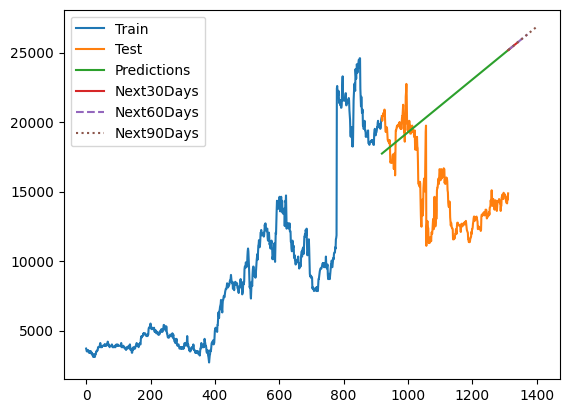

In [24]:
# 10. Vẽ hình
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days', linestyle='--')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days', linestyle=':')
plt.legend()
plt.show()

DP3 Historical Data

In [25]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [26]:
# 2. Đọc file dữ liệu
df = pd.read_csv('DP3 Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [27]:
df

0       61600.0
1       61500.0
2       61000.0
3       61000.0
4       60900.0
         ...   
1132    76300.0
1133    74700.0
1134    74400.0
1135    74900.0
1136    73800.0
Name: Price, Length: 1137, dtype: float64

In [28]:
# 3. Chia dữ liệu train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

In [29]:
# 4. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# 5. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [31]:
# 6. Quá trình tạo index predict 30, 60, 90 ngày tiếp theo
last_index = df.index[-1]

In [32]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [33]:
# 7.Dự đoán giá trong 30, 60 và 90 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [34]:
# 8. Giá dự đoán trong 30, 60 và 90 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[21865.9982112  21884.96932633 21903.94044146 21922.91155659
 21941.88267171 21960.85378684 21979.82490197 21998.7960171
 22017.76713223 22036.73824735 22055.70936248 22074.68047761
 22093.65159274 22112.62270787 22131.59382299 22150.56493812
 22169.53605325 22188.50716838 22207.4782835  22226.44939863
 22245.42051376 22264.39162889 22283.36274402 22302.33385914
 22321.30497427 22340.2760894  22359.24720453 22378.21831966
 22397.18943478 22416.16054991]
Predicted closing prices for the next 60 days:
[21865.9982112  21884.96932633 21903.94044146 21922.91155659
 21941.88267171 21960.85378684 21979.82490197 21998.7960171
 22017.76713223 22036.73824735 22055.70936248 22074.68047761
 22093.65159274 22112.62270787 22131.59382299 22150.56493812
 22169.53605325 22188.50716838 22207.4782835  22226.44939863
 22245.42051376 22264.39162889 22283.36274402 22302.33385914
 22321.30497427 22340.2760894  22359.24720453 22378.21831966
 22397.18943478 22416.

In [35]:
# 9. Đánh giá độ chính xác thuật toán
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# MAPE
valid_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# MSLE
valid_msle = mean_squared_log_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)
print('Validation MSLE:', valid_msle)
print('Testing MSLE:', test_msle)

Validation RMSE: 7781.265563761791
Testing RMSE: 7781.265563761791
Validation MAPE: 49.62661364635552
Testing MAPE: 49.62661364635552
Validation MSLE: 0.19619194192901138
Testing MSLE: 0.19619194192901138


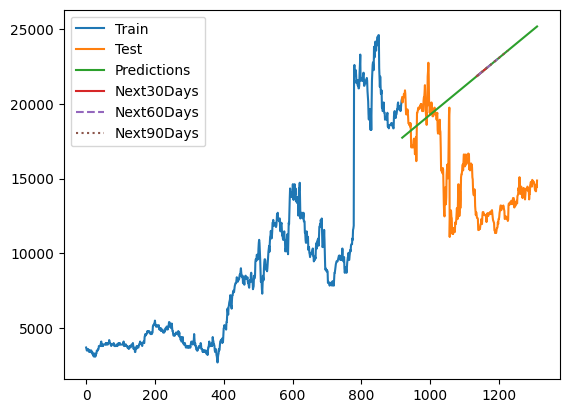

In [36]:
# 10. Vẽ hình
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days', linestyle='--')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days', linestyle=':')
plt.legend()
plt.show()